In [1]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings;warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20


In [2]:
# df = pd.read_csv("Homicide_Dataset_Cleaned.csv")
# print("sample nb= ",len(df))
# print("vars nb= ",len(df.columns))
df = pd.read_csv("Edgar.csv")
print("sample nb= ",len(df))
print("vars nb= ",len(df.columns))

sample nb=  769753
vars nb=  32


In [27]:
df.iloc[:, : 10].head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,ALASKA
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,ALA
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,ALA
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,ALA
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,ALA


In [26]:
df.iloc[:,10 : 20].head()

,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge
0,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,Male,American Indian or Alaskan Native,Unknown or not reported,55
1,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,Male,Black,Unknown or not reported,67
2,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,Female,Black,Unknown or not reported,53
3,January,1,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,Male,Black,Unknown or not reported,35
4,January,1,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,Male,White,Unknown or not reported,25


In [25]:
df.iloc[:, 20 : ].head()

,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,Male,Black,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,Alabama,"Mobile, AL"


In [34]:
df.columns

Index(['ID', 'CNTYFIPS', 'Ori', 'State', 'Agency', 'Agentype', 'Source',
       'Solved', 'Year', 'StateName', 'Month', 'Incident', 'ActionType',
       'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic',
       'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 'FileDate',
       'fstate', 'MSA'],
      dtype='object')

In [8]:
df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
fstate           object
MSA              object
dtype: object

In [69]:
df['Incident'].value_counts()

1      315786
2       86621
3       47063
4       32446
5       24605
        ...  
774        27
773        27
772        27
770        27
0          27
Name: Incident, Length: 1000, dtype: int64

In [68]:
df['MSA'].value_counts()

New York-New Jersey-Long Island, NY-NJ    61292
Los Angeles-Long Beach, CA                55770
Chicago-Naperville-Joliet, IL-IN-WI       33615
Detroit-Warren-Livonia, MI                24853
Houston-Sugar Land-Baytown, TX            22922
                                          ...  
Logan, UT-ID                                 38
Dubuque, IA                                  38
Carson City, NV                              36
Ames, IA                                     27
Rural Massachusetts                           8
Name: MSA, Length: 409, dtype: int64

In [67]:
df['Circumstance'].value_counts()

Other arguments                         201602
Circumstances undetermined              200717
Other                                    99600
Robbery                                  59716
Narcotic drug laws                       28823
Other - not specified                    25566
Juvenile gang killings                   24040
Felon killed by police                   16528
Brawl due to influence of alcohol        16143
Argument over money or property          15371
All suspected felony type                13265
Felon killed by private citizen          12699
Lovers triangle                          12064
Burglary                                  6400
Brawl due to influence of narcotics       5149
Gangland killings                         4845
All other manslaughter by negligence      4764
Arson                                     4581
Rape                                      4191
Other negligent handling of gun           3642
Other sex offense                         1449
Children play

In [6]:
to_print= [ 'Agentype', 'Source',
       'Solved', 'Year', 'Month',
       'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic',
       'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'Circumstance', 'Subcircum', 'VicCount', 'OffCount', 
       'State']

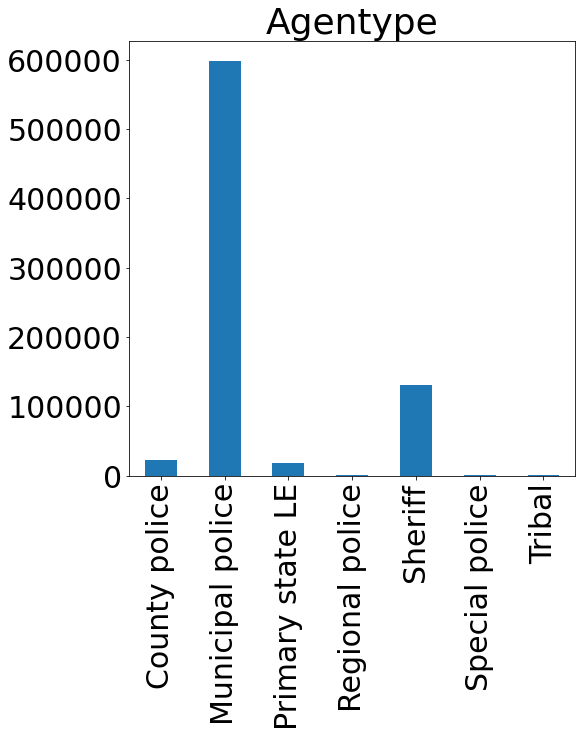

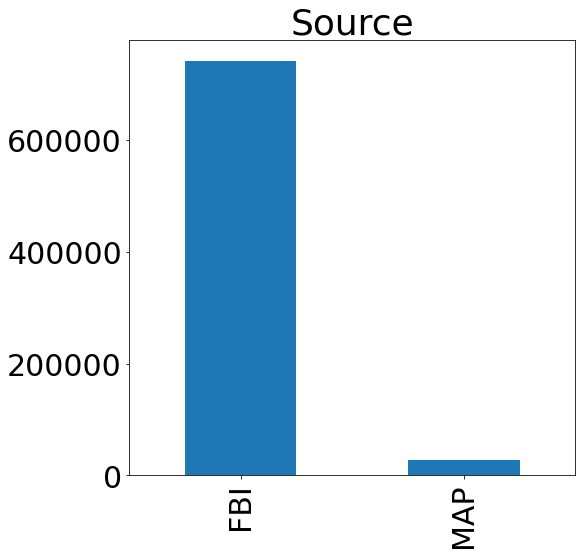

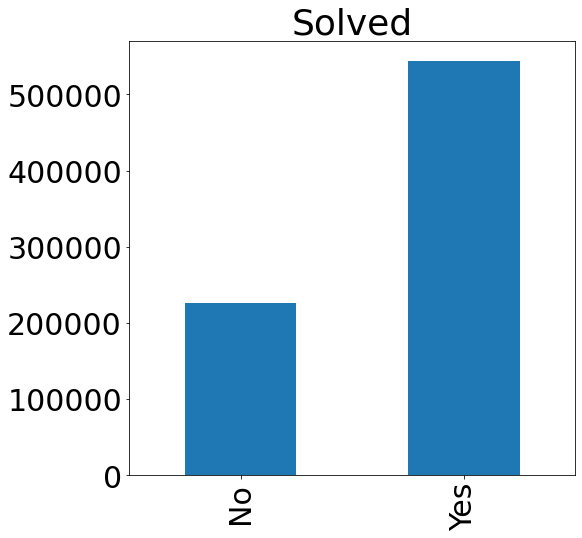

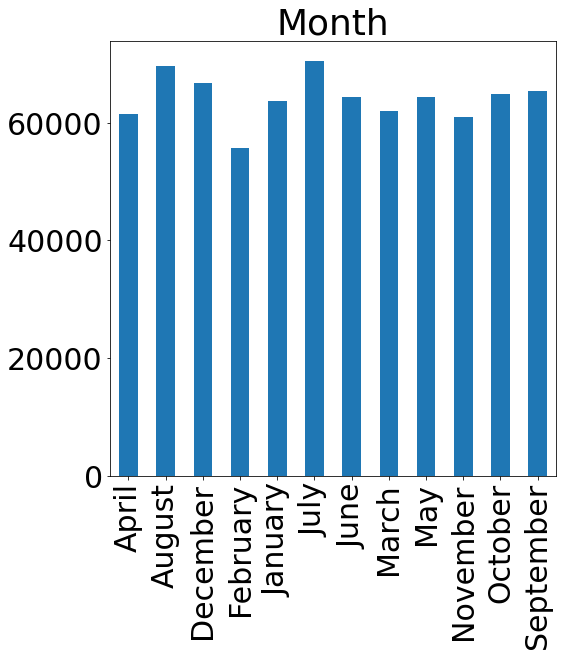

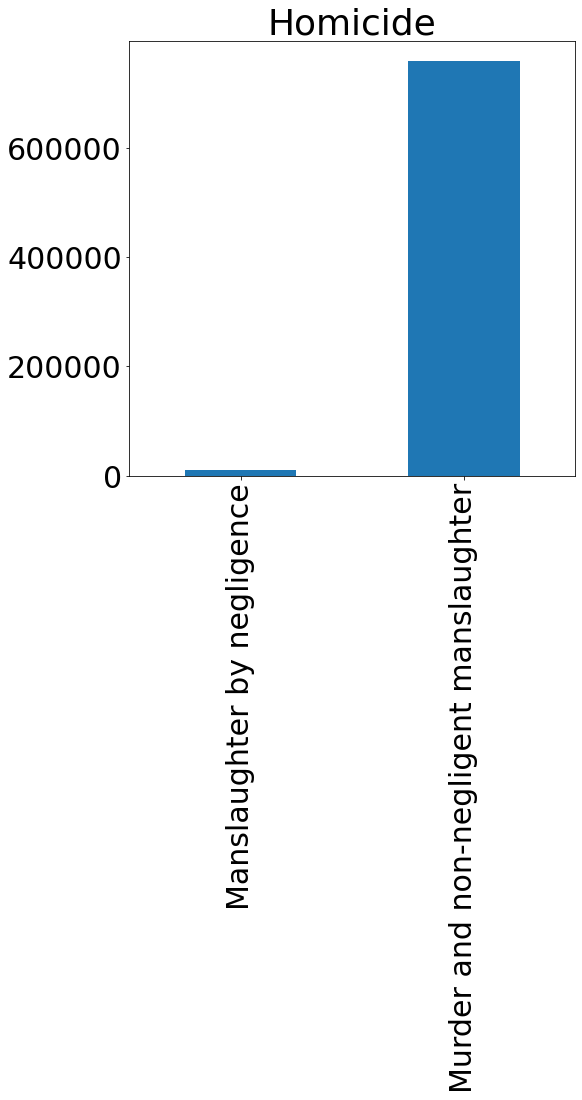

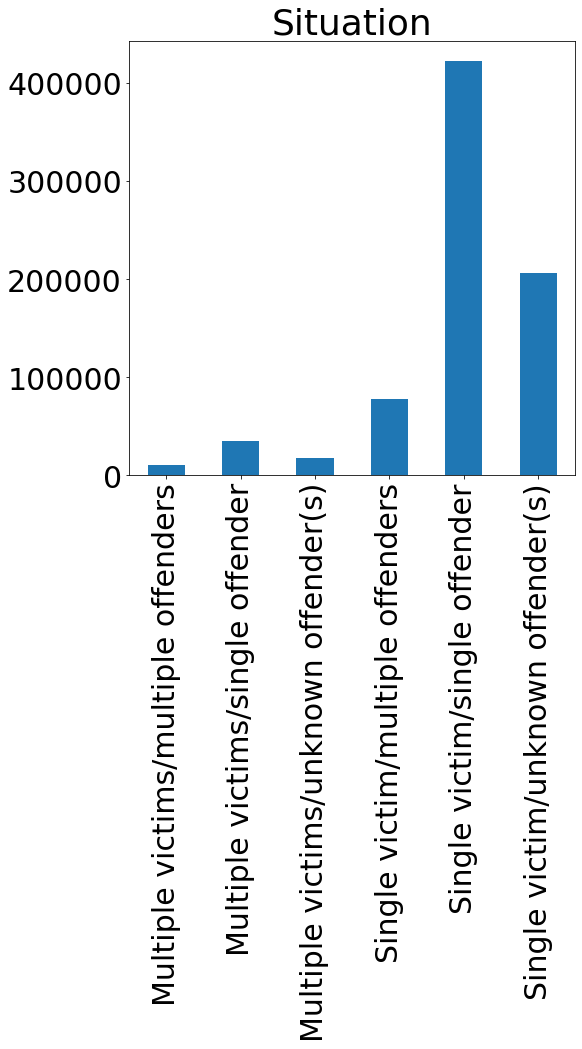

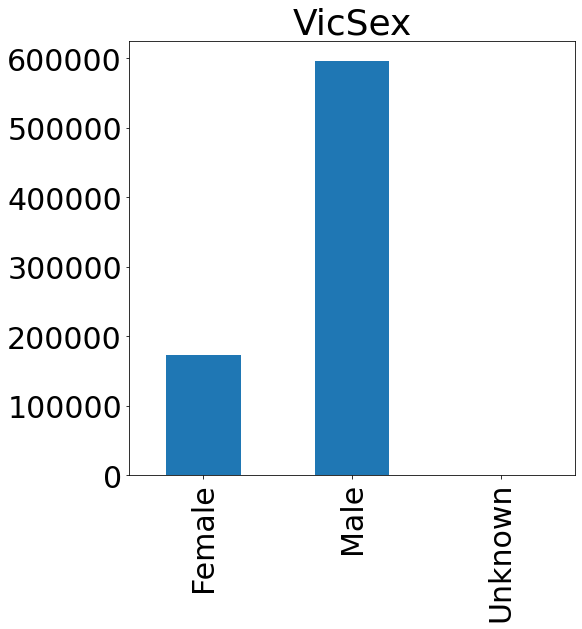

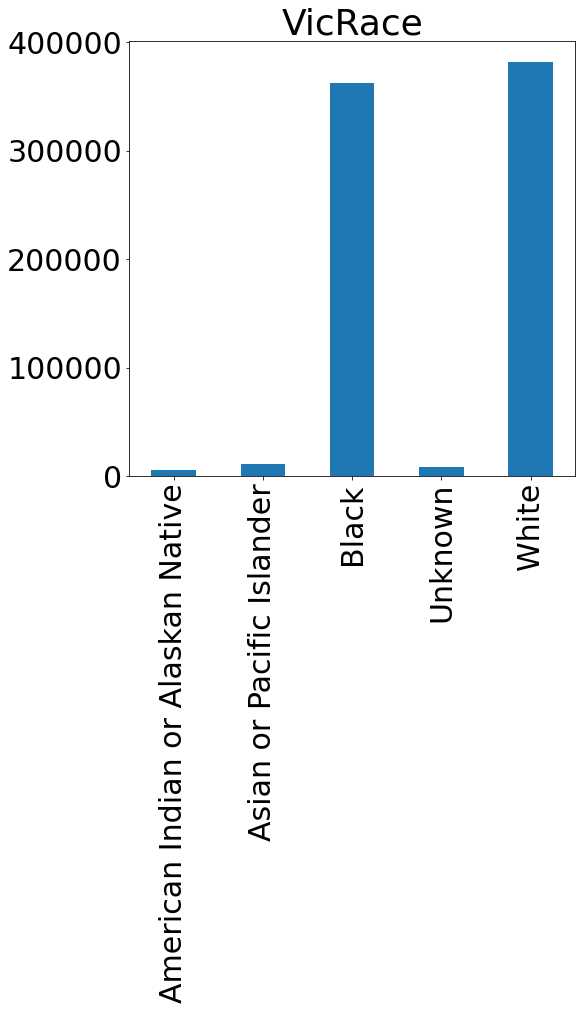

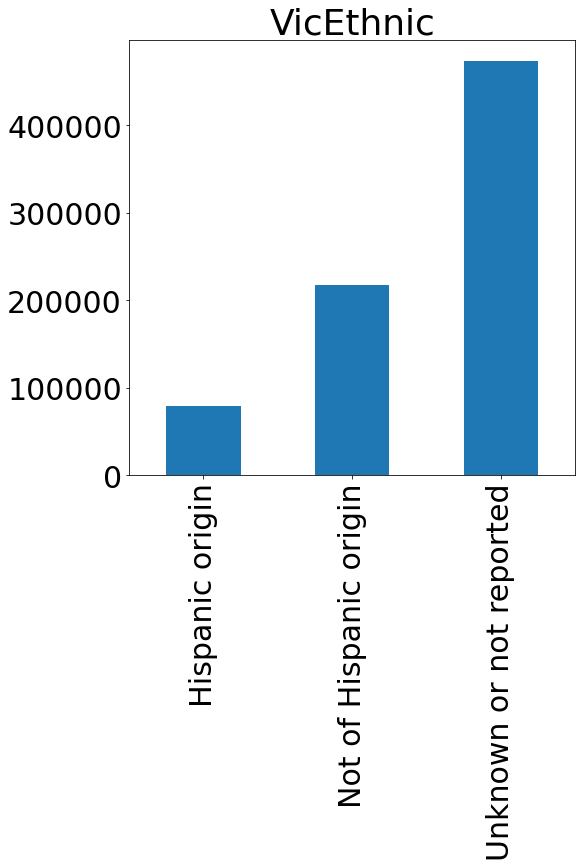

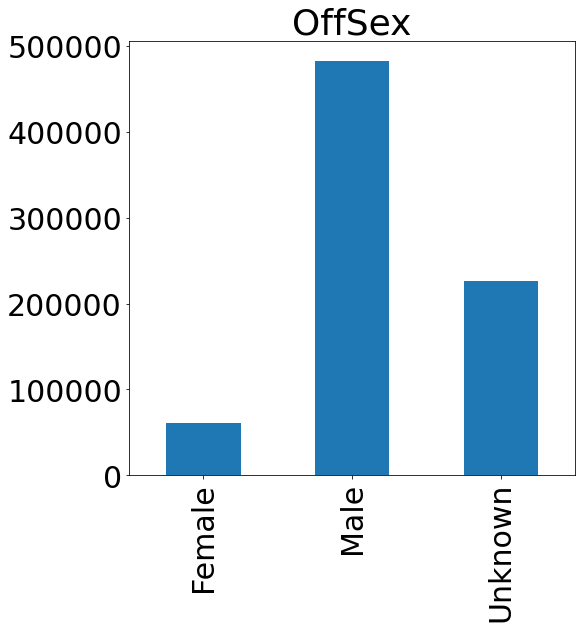

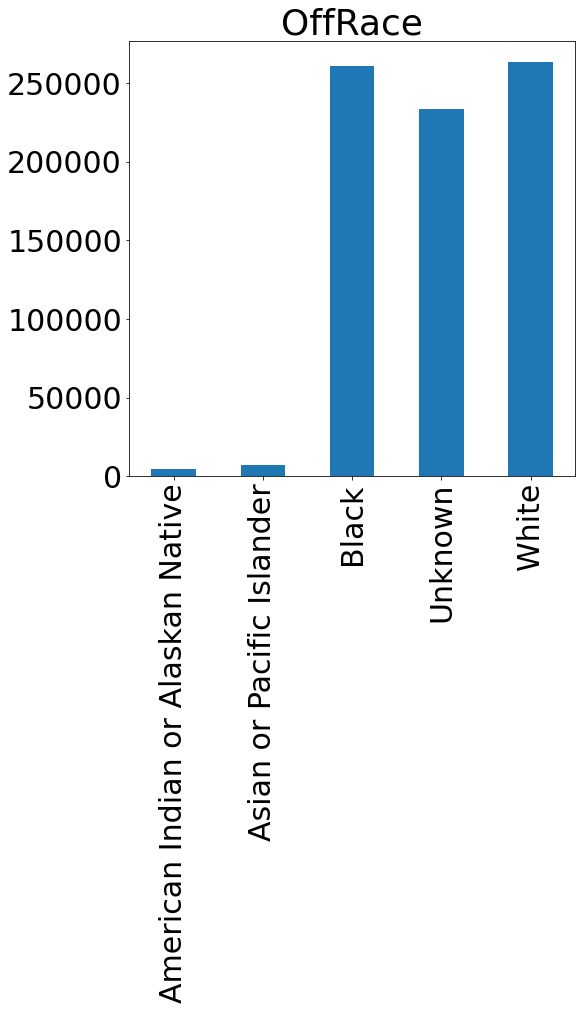

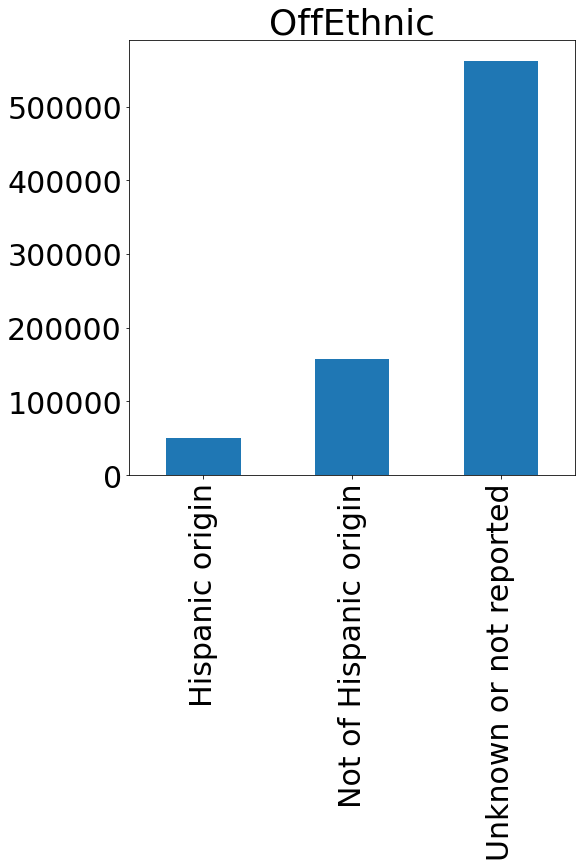

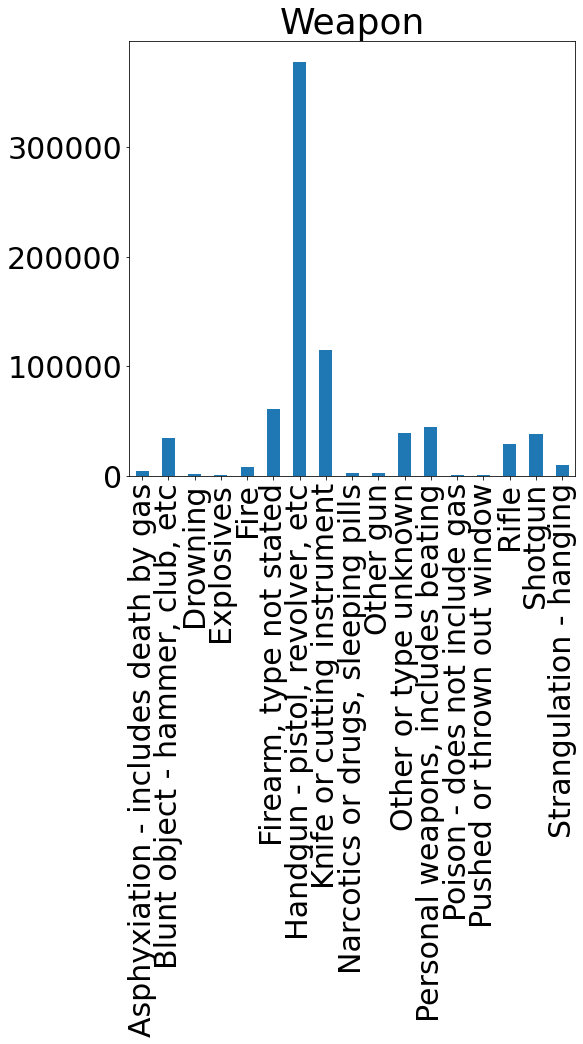

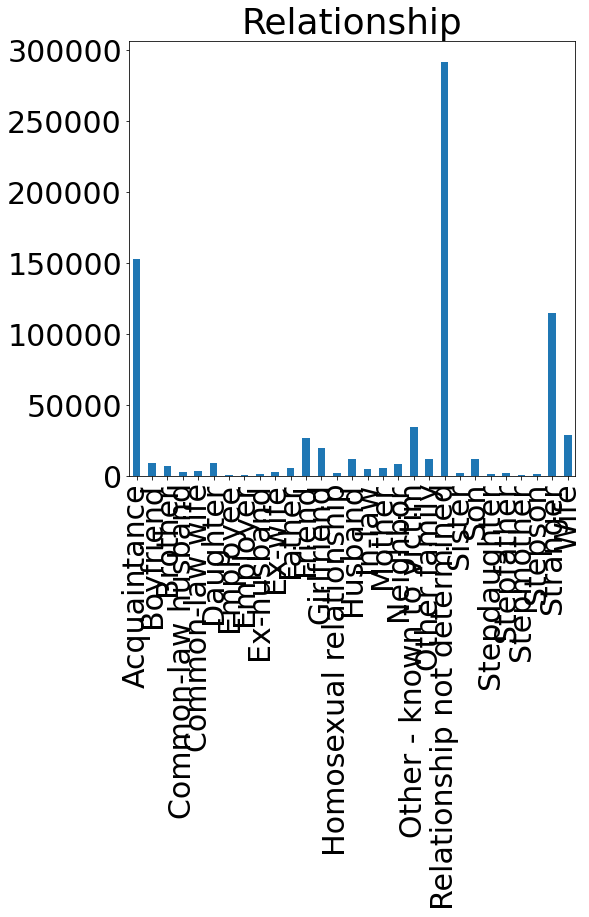

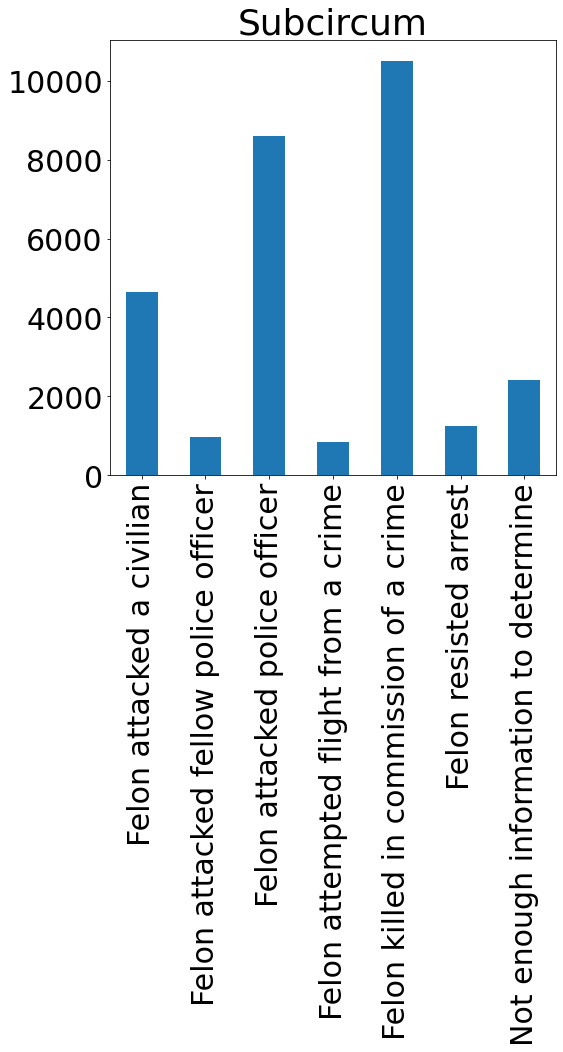

In [7]:
aug_df = pd.DataFrame()
for var in df.columns:
    if df[var].dtypes == 'int64':
        aug_df[var] = df[var]
    elif len(df[var].value_counts()) <= 30 and var in to_print:
        dummies = pd.get_dummies(df[var],prefix=var)
        aug_df = pd.concat([aug_df, dummies], axis=1)
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(1, 1, 1)
        df[var].value_counts().sort_index().plot.bar()
        plt.title(var)
        

In [38]:
all_corrs = aug_df.corr()

all_corrs_list = []
i = 0;
for col in all_corrs.columns:
    i+=1;
    for row in all_corrs.index[i:]:
        a ="Unknown" not in col
        b ="Unknown" not in row
        if a and b: 
            all_corrs_list.append((col, row, abs(all_corrs[col][row])))
        
sorted_list = list(sorted(all_corrs_list,key = lambda i: i[2]))

In [43]:
print("See if there are any redundant variables")
for i in range(6,30):
    print(sorted_list[len(sorted_list)-i])

See if there are any redundant variables
('Solved_Yes', 'Situation_Single victim/unknown offender(s)', 0.9348210714909271)
('Solved_No', 'Situation_Single victim/unknown offender(s)', 0.9348210714909271)
('Solved_Yes', 'OffAge', 0.9071367740832512)
('Solved_No', 'OffAge', 0.9071367740832512)
('Situation_Single victim/unknown offender(s)', 'OffAge', 0.8535524397917996)
('Agentype_Municipal police', 'Agentype_Sheriff', 0.8405849163802621)
('Solved_Yes', 'OffSex_Male', 0.8338854753627057)
('Solved_No', 'OffSex_Male', 0.8338854753627057)
('Source_MAP', 'Incident', 0.8264859611475474)
('Source_FBI', 'Incident', 0.8264859611475474)
('Situation_Single victim/unknown offender(s)', 'OffSex_Male', 0.779369376416816)
('Situation_Single victim/multiple offenders', 'OffCount', 0.7588780969850621)
('OffAge', 'OffSex_Male', 0.7469921651814598)
('Solved_Yes', 'Relationship_Relationship not determined', 0.7244981696921782)
('Solved_No', 'Relationship_Relationship not determined', 0.7244981696921782)
('

In [60]:
print("Discrete variables :")
print(df.dtypes[df.dtypes == "object"])
print("missing values: ")
print(df[:].isnull().sum().sort_values(ascending = False))

Discrete variables :
ID              object
CNTYFIPS        object
Ori             object
State           object
Agency          object
Agentype        object
Source          object
Solved          object
StateName       object
Month           object
ActionType      object
Homicide        object
Situation       object
VicSex          object
VicRace         object
VicEthnic       object
OffSex          object
OffRace         object
OffEthnic       object
Weapon          object
Relationship    object
Circumstance    object
Subcircum       object
fstate          object
MSA             object
dtype: object
missing values: 
Subcircum       740569
FileDate          1232
MSA                  0
Solved               0
ActionType           0
Incident             0
Month                0
StateName            0
Year                 0
Agentype             0
Source               0
Situation            0
Agency               0
State                0
Ori                  0
CNTYFIPS             0
Homic

In [64]:
print((df[:]=="Unknown").sum().sort_values(ascending =False))

OffRace         233623
OffSex          226600
VicRace           8332
VicSex            1242
Agency              42
MSA                  0
Incident             0
Month                0
StateName            0
Year                 0
Homicide             0
Solved               0
Source               0
Agentype             0
State                0
Ori                  0
CNTYFIPS             0
ActionType           0
VicAge               0
Situation            0
fstate               0
VicEthnic            0
OffAge               0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum            0
VicCount             0
OffCount             0
FileDate             0
ID                   0
dtype: int64


Text(0.5, 1.0, 'missing values per variables')

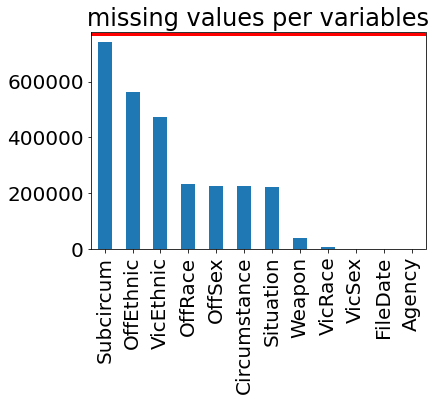

In [81]:
sums =[]
missing_vars = []
for v in df.columns:
    this_sum = int(df[v].isnull().sum())
    try:
        unk=sum(df[v].str.contains("nknown|undetermined|not specified",regex = True))
        if not np.isnan(unk):
            this_sum+=unk
    except: 
        a=0
    sums.append(this_sum)
    
missing_vars = pd.Series(index = df.columns, data =sums)

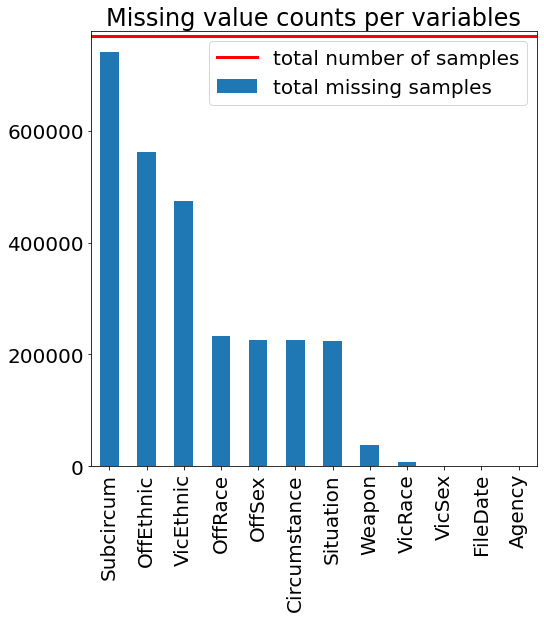

In [94]:
fig = plt.figure(figsize=(8,8))
missing_vars[missing_vars>0].sort_values(ascending = False).plot.bar(label = "total missing samples")
plt.axhline(y=len(df),linewidth=3, color='r', linestyle='-', label = "total number of samples")
plt.title("Missing value counts per variables")
plt.legend()
plt.rcParams['font.size'] = 30


In [5]:
df_sub = df.drop(["Subcircum","OffEthnic","VicEthnic"],axis = 1)

print(len(df_sub))
df_sub_full = df_sub.dropna()
print(len(df_sub_full))

for col in df_sub.columns:
    try:
        df_sub_full = df_sub_full[df_sub_full[col].str.contains("nknown|undetermined|not specified",regex = True)==False]
    except:
            a=0
print(len(df_sub_full))


769753
768521
425886


In [14]:
df_sub_full.to_csv('non_empty_sample.csv')

In [15]:
df_miss = df_sub.drop(df_sub_full.index)

In [16]:
len(df_miss)

343867

In [17]:
df_miss.to_csv('missing_sample.csv')

In [64]:
for i in df.columns:
    x=df[i].value_counts()
    print(x)


197702001NY05904    13
199204001FL05003    12
201405001CA04200    12
201207003CO00101    10
198302005WASPD00    10
                    ..
200504002TNMPD00     1
200902017TXHPD00     1
199602001IN07102     1
199411001VA10900     1
200704001NJ00408     1
Name: ID, Length: 735419, dtype: int64
Los Angeles, CA              51417
New York, NY                 45376
Cook, IL                     28263
Wayne, MI                    22577
Harris, TX                   19844
                             ...  
Winnebago, IA                    1
Henderson, IL                    1
Bon Homme, SD                    1
Skagway-Hoonah-Angoon, AK        1
Ida, IA                          1
Name: CNTYFIPS, Length: 3061, dtype: int64
NY03030    45359
CA01942    27166
ILCPD00    26782
MI82349    20359
TXHPD00    15784
           ...  
MN05900        1
MI82624        1
OH07709        1
TX08904        1
TX03711        1
Name: Ori, Length: 12729, dtype: int64
California              116613
Texas                  

California              116613
Texas                    74041
New York                 58384
Florida                  44690
Michigan                 34027
Illinois                 33571
Pennsylvania             29406
Georgia                  25324
North Carolina           24536
Ohio                     24064
Louisiana                23814
Maryland                 20269
Virginia                 18803
Missouri                 18429
Tennessee                18013
New Jersey               16959
Alabama                  15689
Arizona                  14942
South Carolina           14385
Indiana                  13867
Oklahoma                 10609
Washington                9130
Kentucky                  8756
Arkansas                  8348
District of Columbia      8334
Colorado                  7947
Mississippi               7844
Wisconsin                 7521
Massachusetts             7234
Nevada                    6664
Connecticut               5644
New Mexico                5048
Oregon  